# Домашнее задание 3

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_3

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Вновь рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i).
\end{equation}

В прошлом задании работа шла с линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$. 

__(а)__ В дополнение к квадратичной функции потерь реализуйте логистическую/сигмоидную: $l(z,y) = \ln (1 + \exp(-yz))$ __(Важно: $y$ должен принимать значения $-1$ или $1$ )__. Выпишите градиент. Является ли новая задача регресии выпуклой? Оцените $L$ для новой функции потерь. 

\begin{equation}
f(w) = \frac{1}{n} \sum\limits_{i=1}^n \ln(1 + \exp(-y_i \cdot (w^Tx_i)) ).
\end{equation}

\begin{equation}
grad f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{(- y_i \cdot x_i)\exp(-y_i \cdot (w^Tx_i))}{1 + \exp(-y_i \cdot (w^Tx_i))}
\end{equation}

\begin{equation}
grad f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{- y_i \cdot x_i}{1 + \exp(y_i \cdot (w^Tx_i))}
\end{equation}

\begin{equation}
hessian f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 \cdot x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2} \exp(y_i \cdot (w^T x_i))
\end{equation}


Моя оценка:
$$
L \geq \lambda_{max} \left( \frac{1}{4n} \sum\limits_{i=1}^n x_i x_i^T \right)

$$

__(б)__ Возьмите датасет _mushrooms_ из прошлого задания. Проделайте следующие шаги из прошлого задания, только с логистической функцией потерь:

1) Разделите данные на две части: обучающую и тестовую.

2) Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

3) Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

4) Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

5) Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [3]:
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y = y*2 - 3
print(X.shape, y.shape)

(8124, 112) (8124,)


#### 1. Разделите данные на две части: обучающую и тестовую.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 2. Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

In [5]:
hessian = np.zeros((d, d))

for a, b in zip(X_train[:], y_train):
    hessian = hessian + 1/n  * np.outer(a, a)

hessian = hessian / 4
L = np.linalg.norm(hessian, 2)

In [64]:
print("Константа Липшица:", L)

Константа Липшица: 2.068664202412525


## Вывод: 
Константа Липшица получилась равна 2.07

#### 3. Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

In [110]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLogisticRegression

In [66]:
def func_draw_error_accuracy(step, model):
    
    _, ax = plt.subplots(1, 2, figsize=(21, 7))
    y = np.array(model.get_errors())
    x = np.linspace(step, step * len(y), len(y))

    ax[0].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
    ax[0].plot(x, np.log(y))

    ax[0].set_xlabel("Номер итерации")
    ax[0].set_ylabel("Логарифм ошибки")

    y = np.array(model.get_accuracy())
    x = np.linspace(step, step*len(y), len(y))

    ax[1].set_title("Точность предсказания от номера итерациии")
    ax[1].plot(x, y)

    ax[1].set_xlabel("Номер итерации")
    ax[1].set_ylabel("Точность")

In [111]:
step = 20
iter = 80
eps = 5*10e-4
linear_model = MyLogisticRegression(fit_intercept=True)
linear_model.fit(X_train, y_train, iter=iter, eps=eps, step=step)

0: 0.318648
1: 0.217678
2: 0.165894
3: 0.134620
4: 0.113615
5: 0.098474
6: 0.087005
7: 0.077996
8: 0.070719
9: 0.064713
10: 0.059669
11: 0.055371
12: 0.051664
13: 0.048435
14: 0.045597
15: 0.043083
16: 0.040841
17: 0.038829
18: 0.037013
19: 0.035366
20: 0.033865
21: 0.032492
22: 0.031231
23: 0.030069
24: 0.028994
25: 0.027998
26: 0.027071
27: 0.026206
28: 0.025399
29: 0.024642
30: 0.023931
31: 0.023263
32: 0.022633
33: 0.022039
34: 0.021476
35: 0.020944
36: 0.020438
37: 0.019959
38: 0.019502
39: 0.019067
40: 0.018653
41: 0.018257
42: 0.017879
43: 0.017517
44: 0.017171
45: 0.016838
46: 0.016520
47: 0.016214
48: 0.015920
49: 0.015637
50: 0.015364
51: 0.015102
52: 0.014849
53: 0.014605
54: 0.014369
55: 0.014141
56: 0.013921
57: 0.013708
58: 0.013502
59: 0.013303
60: 0.013109
61: 0.012922
62: 0.012740
63: 0.012564
64: 0.012392
65: 0.012226
66: 0.012064
67: 0.011907
68: 0.011754
69: 0.011605
70: 0.011460
71: 0.011319
72: 0.011182
73: 0.011048
74: 0.010917
75: 0.010790
76: 0.010666
77: 0.010

Accuracy score:  0.9341538461538461


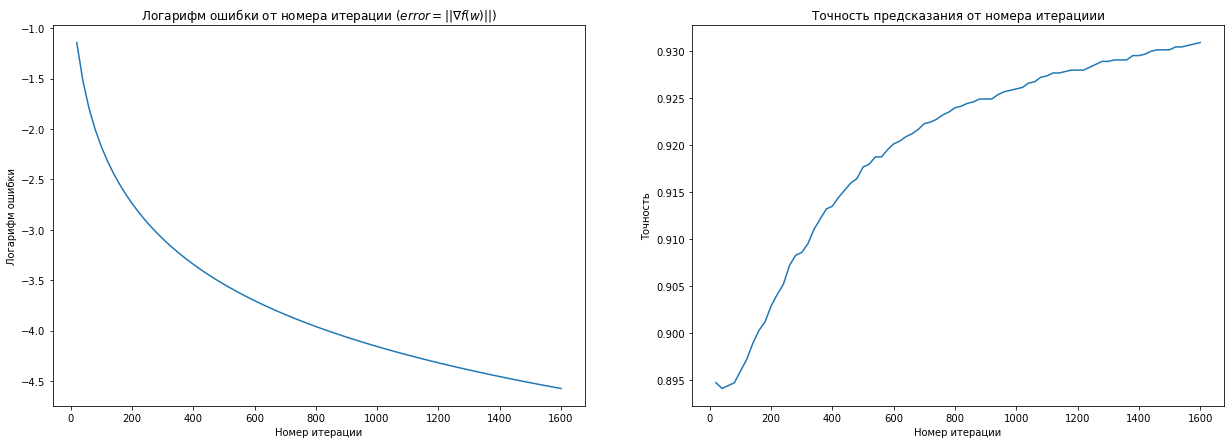

In [112]:
func_draw_error_accuracy(step, linear_model)
y_pred = linear_model.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

In [23]:
from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  1.0


В сравнении с пакетным решением, моя реализация логистической регрессии проигрывает на порядок.
Это понятно, но непонятно почему настолько проигрывает в точности. 

#### 4. Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

In [142]:
step = 20
iter = 80
eps = 5*10e-5
l2_coef = 0.05
linear_model_l2 = MyLogisticRegression()
linear_model_l2.fit(X_train, y_train, eps=eps, iter=10e4, l2=True, step=step, l2_coef=l2_coef)

0.9341538461538461
0.9021538461538462


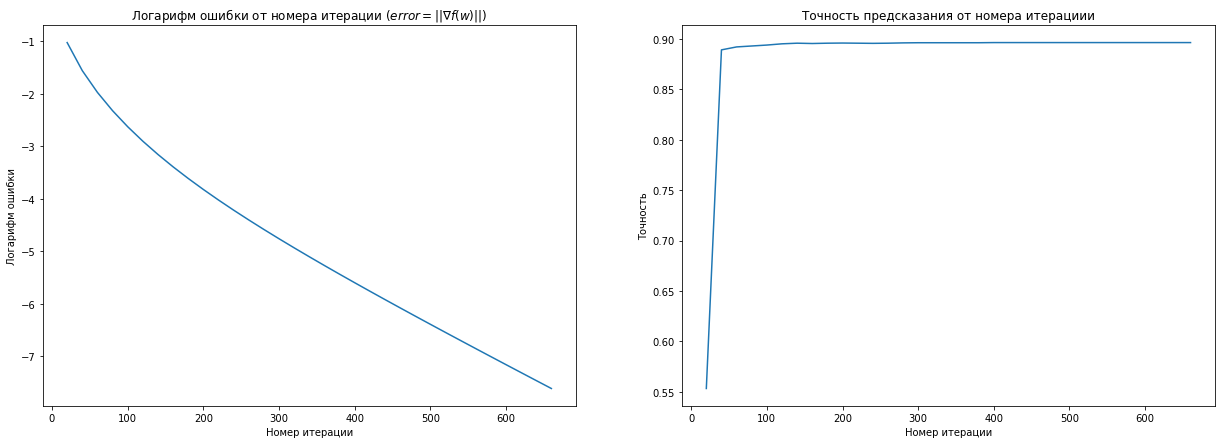

In [141]:
func_draw_error_accuracy(step, linear_model_l2)
y_pred1 = linear_model.predict(X_test)
y_pred2 = linear_model_l2.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred2))

Добавив регуляризацию я получил более быструю скорость сходимости, но потерял в точности.

#### 5. Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [108]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLinearRegression

In [109]:
step = 10
iter = 10e5
eps = 5*10e-4
linear_model_reg = MyLinearRegression()

linear_model_reg.fit(X_train, y_train, iter=iter, eps=eps, step=step)

Accuracy score: 0.9969


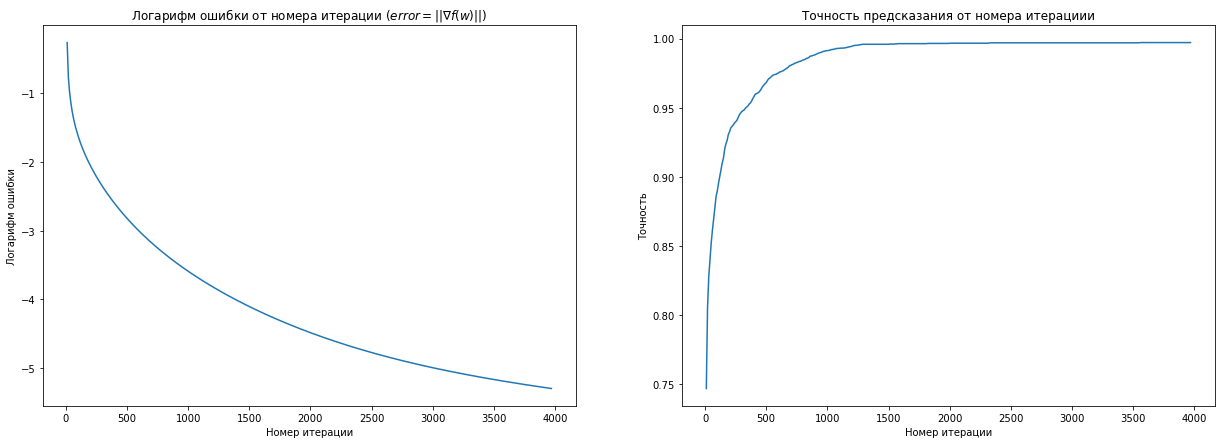

In [29]:
func_draw_error_accuracy(step, linear_model_reg)

print("Accuracy score: %.4f" % accuracy_score(y_test, linear_model_reg.predict(X_test)))

Да, квадратичной функции требуется большее количество шагов, чем логрегрессии, но это неважно, т.к. обучается она быстрее, т.к. градиент считается быстрее, а точность показывает близкую к пакетному решению из sklearn. Поэтому даже односвязная нейросеть показывает лучший результат, чем логрегрессия. По крайне мере, на этой задаче.

## Задача 2

__(a)__ Реализуйте метод тяжелого шарика. 

Метод тяжелого шарика:
$$
v_{k+1} := \beta \cdot v_k + (1 - \beta) \cdot \nabla f(w_k)
\\
w_{k+1} := w_k - lr \cdot v_{k+1}
$$

In [121]:
step = 50
iter = 10e5
eps = 5*10e-4
linear_model_heavy = MyLogisticRegression()

linear_model_heavy.fit(X_train, y_train, iter=iter, eps=eps, step=step, heavy_ball=True, beta=0.1)

0: 0.204120
1: 0.116277
2: 0.081934
3: 0.063525
4: 0.052012
5: 0.044131
6: 0.038401
7: 0.034046
8: 0.030623
9: 0.027860
10: 0.025580
11: 0.023665
12: 0.022034
13: 0.020626
14: 0.019399
15: 0.018319
16: 0.017361
17: 0.016505
18: 0.015735
19: 0.015040
20: 0.014408
21: 0.013831
22: 0.013302
23: 0.012815
24: 0.012366
25: 0.011949
26: 0.011562
27: 0.011201
28: 0.010864
29: 0.010547
30: 0.010251
31: 0.009971
32: 0.009708
33: 0.009459
34: 0.009224
35: 0.009000
36: 0.008788
37: 0.008586
38: 0.008394
39: 0.008211
40: 0.008036
41: 0.007869
42: 0.007709
43: 0.007555
44: 0.007408
45: 0.007267
46: 0.007131
47: 0.007000
48: 0.006875
49: 0.006753
50: 0.006637
51: 0.006524
52: 0.006415
53: 0.006310
54: 0.006208
55: 0.006110
56: 0.006015
57: 0.005923
58: 0.005833
59: 0.005747
60: 0.005663
61: 0.005581
62: 0.005502
63: 0.005425
64: 0.005350
65: 0.005277
66: 0.005207
67: 0.005138
68: 0.005071
69: 0.005005
70: 0.004966


Accuracy score: 0.9397


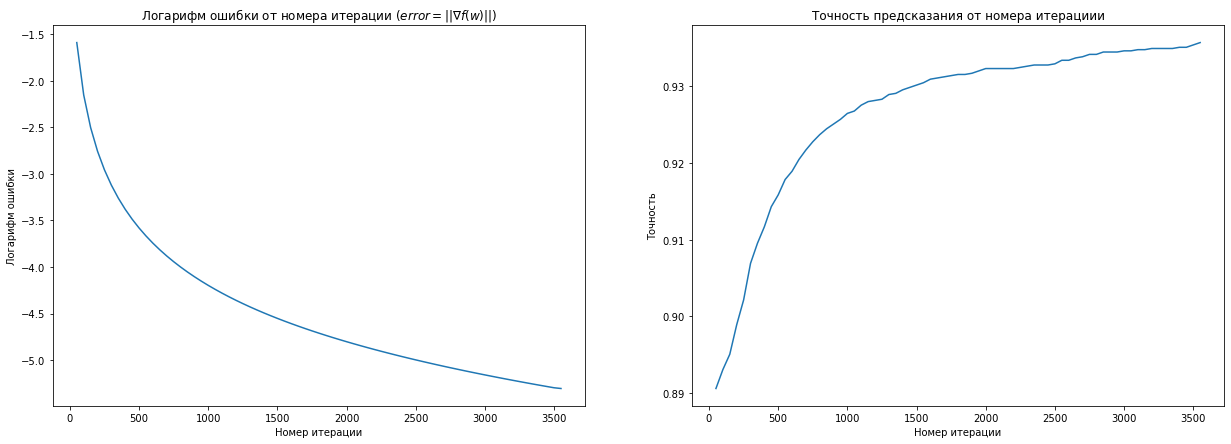

In [122]:
func_draw_error_accuracy(step, linear_model_heavy)

print("Accuracy score: %.4f" % accuracy_score(y_test, linear_model_heavy.predict(X_test)))

__(б)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [130]:
betas = [-1, -0.50, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
step = 10
iter = 160
eps = 5*10e-3
errors = []
accuracy = []
parameters = []
alpha = 0.9

for beta in betas:
    lin_mod = MyLogisticRegression()
    lin_mod.fit(X_train, y_train, iter=iter, eps=eps, step=step, heavy_ball=True, beta=beta)
    parameters.append((alpha, beta))
    errors.append(lin_mod.get_errors())
    accuracy.append(lin_mod.get_accuracy())
    print(accuracy_score(y_test, lin_mod.predict(X_test)))

0.9046153846153846
0.908923076923077
0.9046153846153846
0.9064615384615384
0.9058461538461539
0.9113846153846153
0.9095384615384615
0.9076923076923077
0.9070769230769231
0.9058461538461539


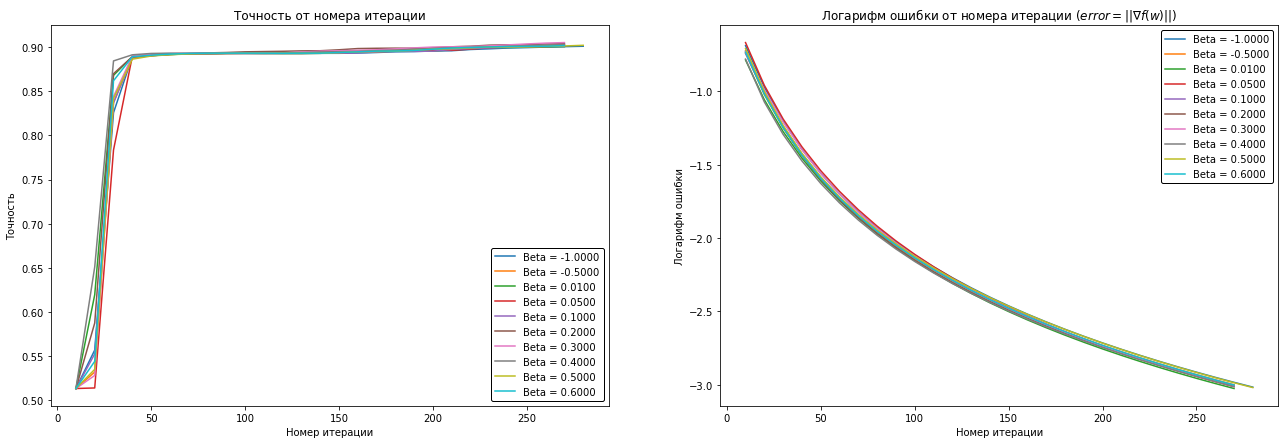

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(22, 7))

ax[0].set_title("Точность от номера итерации")

for i in range(len(accuracy)): 
    # Рисуем
    y = accuracy[i]
    x = np.linspace(step, step * len(y), len(y))
    ax[0].plot(x, y, label='Beta = %.4f' % (parameters[i][1]))

ax[0].set_xlabel("Номер итерации")
ax[0].set_ylabel("Точность")

legend_box = ax[0].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

ax[1].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) || $)")

for i in range(len(errors)): 
    # Рисуем
    y = errors[i]
    x = np.linspace(step, step * len(y), len(y))
    ax[1].plot(x, np.log(y), label='Beta = %.4f' % (parameters[i][1]))

ax[1].set_xlabel("Номер итерации")
ax[1].set_ylabel("Логарифм ошибки")

legend_box = ax[1].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

__(в)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод.

In [134]:
lin_mod = MyLogisticRegression()
lin_mod_heavy = MyLogisticRegression()

step = 10
iter = 160
eps = 5*10e-3

lin_mod.fit(X_train, y_train, iter=iter, eps=eps, step=step)
lin_mod_heavy.fit(X_train, y_train, iter=iter, eps=eps, step=step, heavy_ball=True, beta=0.05)

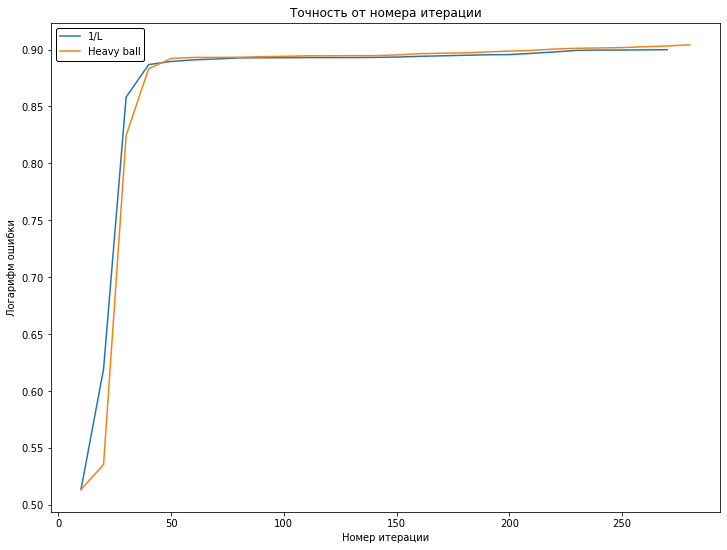

In [136]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.set_title("Точность от номера итерации")

y = lin_mod.get_accuracy()
x = np.linspace(step, step * len(y), len(y))
ax.plot(x, y, label='1/L')

y = lin_mod_heavy.get_accuracy()
x = np.linspace(step, step * len(y), len(y))
ax.plot(x, y, label='Heavy ball')


ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")

legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

__(г)__ Если в пунктах (б) и (в) столкнулись с проблемами, попробуйте $\ell_2$-регуляризовать задачу или рассмотреть ее на ограниченном множестве.

Никаких проблем не случилось, l2-регуляризация показывает худший результат в точности, но сходится намного быстрее.

__(д)__ Реализуйте ускоренный метод Нестерова (в форме Нестерова, а не который доказывали на семинаре). 

Метод Нестерова:

$$
v_{k+1} := \beta \cdot v + (1 - \beta) \cdot \nabla f(w_k - lr \cdot \beta \cdot v_k)
\\
w_{k + 1} := w_k - lr \cdot v_{k+1}
$$

In [139]:
step = 50
iter = 80
eps = 5*10e-4
linear_model_nesterov = MyLogisticRegression()

linear_model_nesterov.fit(X_train, y_train, iter=iter, eps=eps, step=step, nesterov_moment=True, beta=0.05)

Accuracy score:  0.9064615384615384


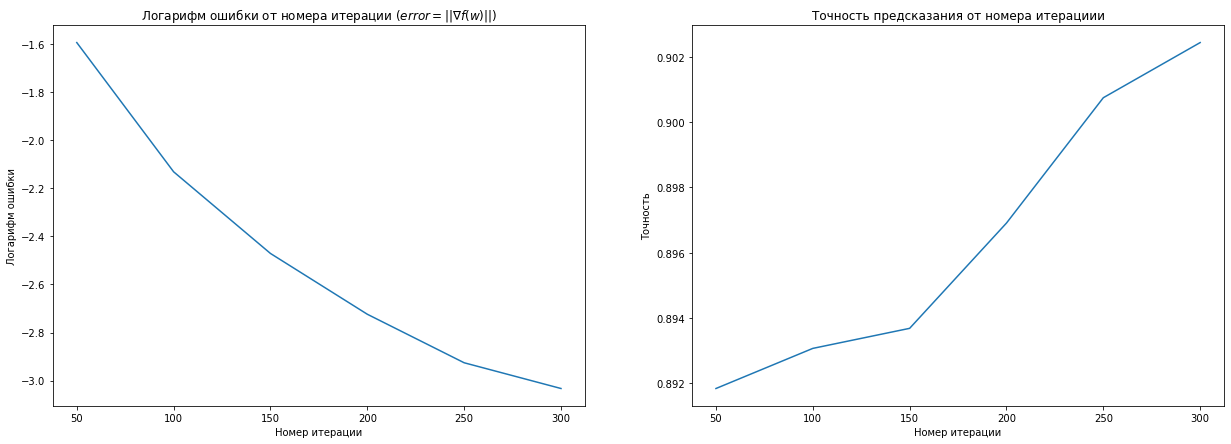

In [138]:
func_draw_error_accuracy(step, linear_model_nesterov)
print("Accuracy score: ", accuracy_score(y_test, linear_model_nesterov.predict(X_test)))

__(е)__ Решите задачу логистической регресии с помощью метода Нестерова (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

Оценить $\mu$ снизу никак нельзя, кроме как нулем. Задача является выпуклой, но не сильно выпуклой, поэтому моментум, равный: $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$, рассматриваться не будет.

In [146]:
betas = [-1, -0.50, -0.1, 0.05, 0.1, 0.5, 1]
step = 10
iter = 160
eps = 5*10e-3
errors = []
accuracy = []
parameters = []
for beta in betas:
    lin_mod = MyLogisticRegression()
    lin_mod.fit(X_train, y_train, iter=iter, eps=eps, step=step, nesterov_moment=True, beta=beta)
    parameters.append(beta)
    errors.append(lin_mod.get_errors())
    accuracy.append(lin_mod.get_accuracy())
    print(accuracy_score(y_test, lin_mod.predict(X_test)))

0.9046153846153846
0.9046153846153846
0.9052307692307693
0.9064615384615384
0.9064615384615384
0.904
0.9058461538461539


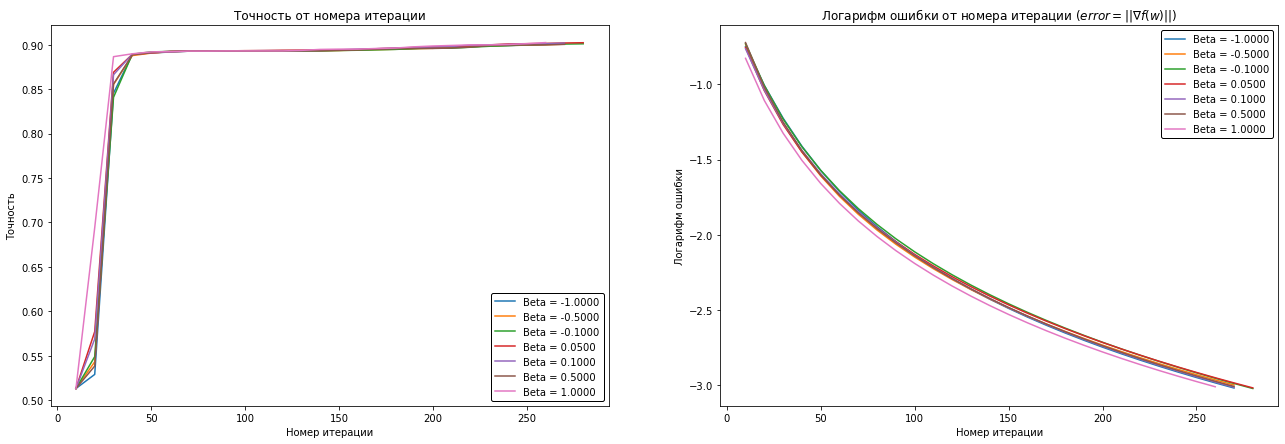

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(22, 7))

ax[0].set_title("Точность от номера итерации")

for i in range(len(accuracy)): 
    # Рисуем
    y = accuracy[i]
    x = np.linspace(step, step * len(y), len(y))
    ax[0].plot(x, y, label='Beta = %.4f' % (parameters[i]))

ax[0].set_xlabel("Номер итерации")
ax[0].set_ylabel("Точность")

legend_box = ax[0].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

ax[1].set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) || $)")

for i in range(len(errors)): 
    # Рисуем
    y = errors[i]
    x = np.linspace(step, step * len(y), len(y))
    ax[1].plot(x, np.log(y), label='Beta = %.4f' % (parameters[i]))

ax[1].set_xlabel("Номер итерации")
ax[1].set_ylabel("Логарифм ошибки")

legend_box = ax[1].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

In [231]:
# k/k+1, k/k+2, k/k+3

lin_mod1 = MyLogisticRegression()
lin_mod2 = MyLogisticRegression()
lin_mod3 = MyLogisticRegression()

lin_mod1.fit_test(X_train, y_train, X_test, y_test, iter=iter, eps=eps, step=step, nesterov_moment=True, beta=beta, dynamic_beta=1)
lin_mod2.fit_test(X_train, y_train, X_test, y_test, iter=iter, eps=eps, step=step, nesterov_moment=True, beta=beta, dynamic_beta=2)
lin_mod3.fit_test(X_train, y_train, X_test, y_test, iter=iter, eps=eps, step=step, nesterov_moment=True, beta=beta, dynamic_beta=3)

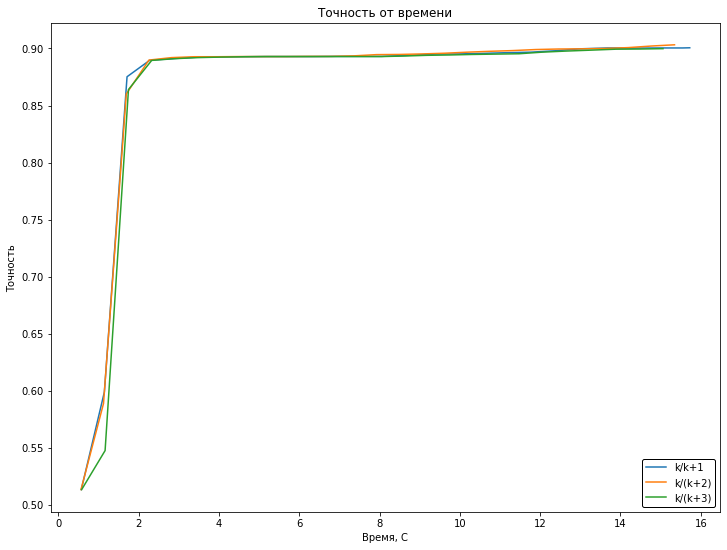

In [234]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.set_title("Точность от времени")


y = lin_mod1.get_accuracy()
x = lin_mod1.get_time()
ax.plot(x, y, label='k/k+1')

y = lin_mod2.get_accuracy()
x = lin_mod2.get_time()
ax.plot(x, y, label='k/(k+2)')

y = lin_mod3.get_accuracy()
x = lin_mod3.get_time()
ax.plot(x, y, label='k/(k+3)')


ax.set_xlabel("Время, С")
ax.set_ylabel("Точность")

legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

__(ж)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжелого шарика и градиентного спуска из пункта (г). Сделайте итоговый вывод.

In [236]:
lin_mod = MyLogisticRegression()

lin_mod.fit_test(X_train, y_train, X_test, y_test, iter=iter, eps=eps, step=step, nesterov_moment=True, beta=0.05)

lin_mod4 = MyLogisticRegression()
lin_mod4.fit_test(X_train, y_train, X_test, y_test, iter=iter, eps=eps, step=step)

lin_mod5 = MyLogisticRegression()
lin_mod5.fit_test(X_train, y_train, X_test, y_test, iter=iter, eps=eps, step=step,  heavy_ball=True, beta=0.05)

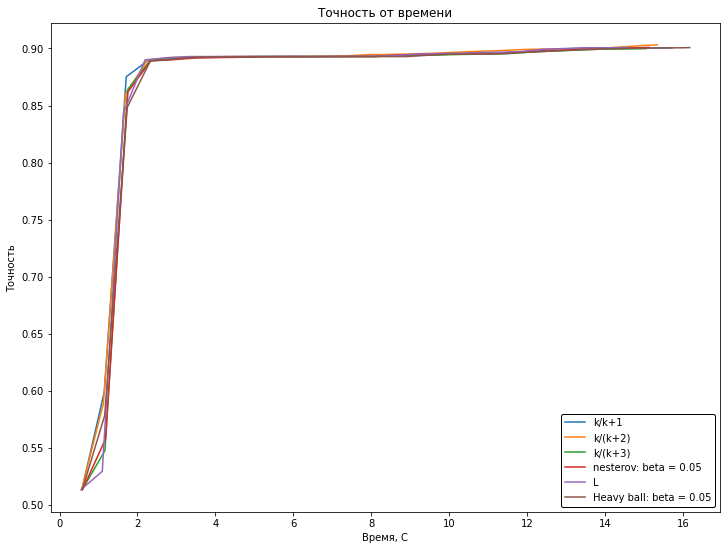

In [237]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.set_title("Точность от времени")


y = lin_mod1.get_accuracy()
x = lin_mod1.get_time()
ax.plot(x, y, label='k/k+1')

y = lin_mod2.get_accuracy()
x = lin_mod2.get_time()
ax.plot(x, y, label='k/(k+2)')

y = lin_mod3.get_accuracy()
x = lin_mod3.get_time()
ax.plot(x, y, label='k/(k+3)')


y = lin_mod.get_accuracy()
x = lin_mod.get_time()
ax.plot(x, y, label='nesterov: beta = 0.05')

y = lin_mod4.get_accuracy()
x = lin_mod4.get_time()
ax.plot(x, y, label='L')

y = lin_mod5.get_accuracy()
x = lin_mod5.get_time()
ax.plot(x, y, label='Heavy ball: beta = 0.05')

ax.set_xlabel("Время, С")
ax.set_ylabel("Точность")

legend_box = ax.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

### Вывод:
Вообще в итоге ничего друг от друга практически не отличается и лучше использовать нейронные сети, работают быстрее и результат выдают лучше.

__Бонусные пункт__

__(з)__ Сделаем подбор константы $L$ адаптивным. Как упоминалось на семинаре, можно измерять локальную $L$, используя:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может подойти процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= f(x) - 1 / L grad_f(x).T @ h + 1 / (2 * L) h.T @ h:
            break
        else:
            L = L * rho
    return L
```

Каким стоит взять __h__? __rho__ должно быть больше или меньше 1? __L0__ надо брать заведомо большим или маленьким?

$L0$  - выбирается, как константа L, т.к. мы её уже знаем на основе нашей задаче, если бы не знали, то взяли $\rho$ больше единицы, а $L0$ равным единице, и постепенно его увеличивая, нашли бы нужную константу L, но в нашей задаче мы её уже знаем, поэтому выбираем другой способ.

$h$ - выбирается в направление антиградиента целевой функции

$\rho$ - выбирается эвристическим путем, как 0.8, т.к. другие показатели работают менее точно или медленно :)

In [204]:

def back_tracking_L(x, f, grad_f, args):
    h = args['h']
    rho = args['rho']
    L = args['L0']
    h_add = args['beta']*(x - args['w_prev'])
    fx = f(x, args)
    gradx = grad_f(x, args)
    k = 0
    # h - выбираем в направление антиградиента
    while True:
        h = -1/L *gradx
        y = x + h
        tmp = f(y, args)
        if tmp > fx + gradx.T@h + L/2*h@h.T:
            break
        else:
            L = L * rho
    L = L / rho
    return 1/L

__(и)__ Поэксперементируйте с этой процедурой, встроенной в подбор $L$ для шага градиентного спуска. В качестве задачи продолжайте рассматривать логистическую регрессию из Задачи 1. Аналогично встройте процедуру подбора $L$ в метод тяжелого шарика и ускоренный метод Нестерова. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно). Отобразите на этом графике градиентный спуск, тяжелый шарик и метод Нестерова с адаптивным шагом и шагом $\frac{1}{L}$ (всего 6 линий на графике). Сделайте вывод.

In [84]:
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y = y*2 - 3
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(8124, 112) (8124,)


In [148]:
hessian = np.zeros((d, d))

for a, b in zip(X_train[:], y_train):
    hessian = hessian + 1/n  * np.outer(a, a)

hessian = hessian / 4
L = np.linalg.norm(hessian, 2)

In [230]:
args = {}
args['X_train'] = X_train
args['X_test']  = X_test
args['y_train'] = y_train
args['y_test']  = y_test
args['L'] = L
args['beta'] = 0.9
args['lambda'] = L/100
# h 
args['h'] = np.ones(args['X_train'].shape[1])/args['X_train'].shape[1]
args['rho'] = 0.8
args['L0'] = 100*L

def function(w, args):
    sum = 0
    X = args['X_train']
    Y = args['y_train']
    n = args['X_train'].shape[0]
    
    for i in range(len(Y)):     
        sum = sum + 1/n * np.log(1 + np.exp(-Y[i] * X[i] @ w)) 
        
    return sum

def grad_function(w, args):
    X = args['X_train']
    Y = args['y_train']
    sum = np.zeros(w.shape)
    n = X.shape[0]
    for i in range(len(Y)):
        sum = sum  - 1/n * Y[i] * X[i] /(1 + np.exp(-Y[i] * w @ X[i])) * np.exp(-Y[i] * w @ X[i])

    return sum

def learning_rate(x, f, grad_f, args):
    return 1/args['L']

In [206]:
print(args['L'])

2.0677750923851335


In [223]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import Optimizer

In [231]:
gd = Optimizer(func=function, grad_func=grad_function, w0=np.ones(args['X_train'].shape[1]), learning_rate=learning_rate, iter=100, args=args, name='gd', label='Gradient Descent')
gd.fit()

heavy_ball = Optimizer(func=function, grad_func=grad_function, w0=np.ones(args['X_train'].shape[1]), learning_rate=learning_rate, iter=100, args=args, name='gdhv', label='Heavy ball')
heavy_ball.fit()

nesterov = Optimizer(func=function, grad_func=grad_function, w0=np.ones(args['X_train'].shape[1]), learning_rate=learning_rate, iter=100, args=args, name='gdnesterov', label='Nesterov')
nesterov.fit()

In [207]:
gd_lr = Optimizer(func=function, grad_func=grad_function, w0=np.zeros(args['X_train'].shape[1]), learning_rate=back_tracking_L, iter=100, args=args, name='gd', label='Gradient Descent Adaptive LR')
gd_lr.fit()

In [208]:
heavy_ball_lr = Optimizer(func=function, grad_func=grad_function, w0=np.ones(args['X_train'].shape[1]), learning_rate=back_tracking_L, iter=100, args=args, name='gdhv', label='Heavy ball Adaptive LR')
heavy_ball_lr.fit()

In [209]:
nesterov_lr = Optimizer(func=function, grad_func=grad_function, w0=np.ones(args['X_train'].shape[1]), learning_rate=back_tracking_L, iter=100, args=args, name='gdnesterov', label='Nesterov Adaptive LR')
nesterov_lr.fit() 

__(к)__ Постройте аналогичный пункту (и) график точности модели от времени.

Text(0, 0.5, 'Точность')

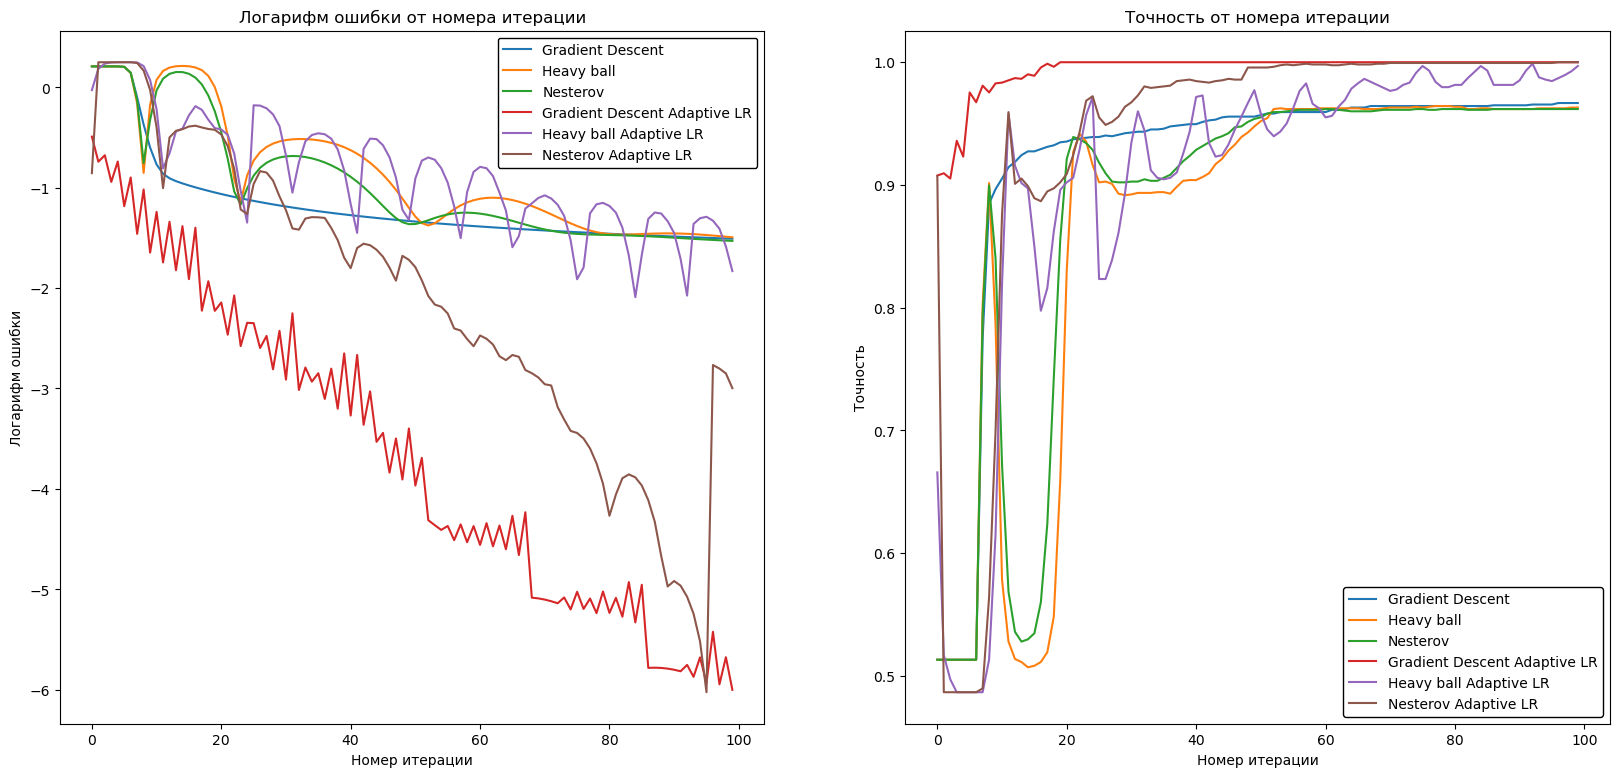

In [210]:
fig, ax = plt.subplots(1, 2, figsize=(20,9))

for tmp in [gd, heavy_ball, nesterov, gd_lr, heavy_ball_lr, nesterov_lr]:
    ax[0].plot(range(len(tmp.errors)), np.log10(tmp.errors), label=tmp.label)
    ax[1].plot(range(len(tmp.accuracy)), tmp.accuracy, label=tmp.label)

ax[0].set_title("Логарифм ошибки от номера итерации")
legend_box = ax[0].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[0].set_xlabel("Номер итерации")
ax[0].set_ylabel("Логарифм ошибки")

ax[1].set_title("Точность от номера итерации")
legend_box = ax[1].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[1].set_xlabel("Номер итерации")
ax[1].set_ylabel("Точность")

Text(0, 0.5, 'Точность')

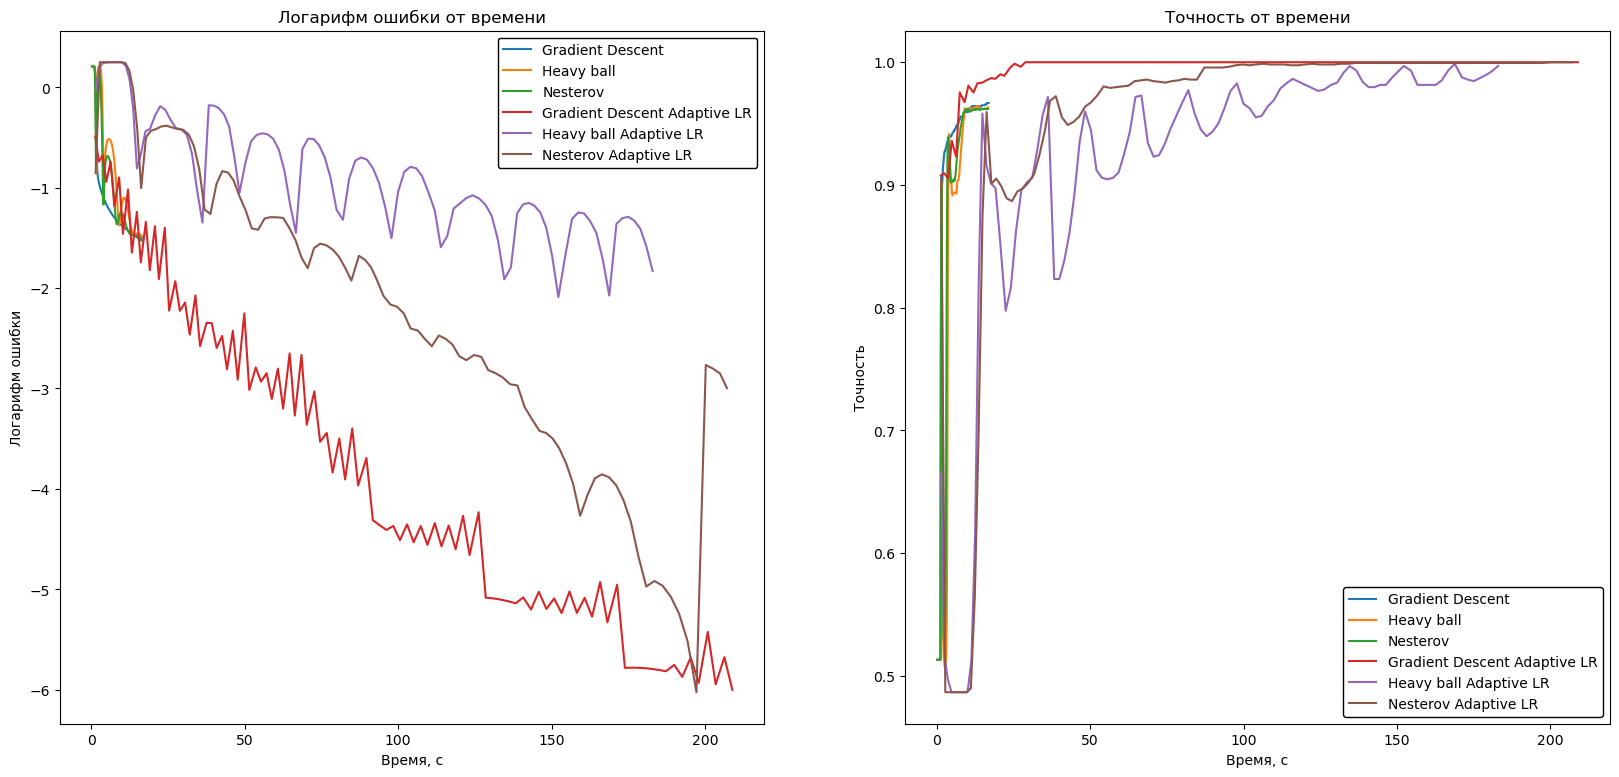

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(20,9))

for tmp in [gd, heavy_ball, nesterov, gd_lr, heavy_ball_lr, nesterov_lr]:
    ax[0].plot(tmp.time, np.log10(tmp.errors), label=tmp.label)
    ax[1].plot(tmp.time, tmp.accuracy, label=tmp.label)

ax[0].set_title("Логарифм ошибки от времени")
legend_box = ax[0].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[0].set_xlabel("Время, с")
ax[0].set_ylabel("Логарифм ошибки")

ax[1].set_title("Точность от времени")
legend_box = ax[1].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[1].set_xlabel("Время, с")
ax[1].set_ylabel("Точность")

# Вывод:
Подбор шага L адаптивно занимает много времени и лучше использовать стандартный шаг и шедулер, который будет его изменять, чем подбирать его адаптивно, также из-за адаптивности сходимость у нас идет волнами, т.к. при вычислении шага L у нас есть сравнение и потеря в машинной точности из-за чего L может сильно отличаться от итерации к итерации. Но важно другое, то что адаптивный шаг показывает лучшую точность на тестовой выборке, хотя этого можно было достичь с помощью sheduler learning rate и за меньшее количество времени.

__(л)__ В [работе](https://arxiv.org/pdf/1204.3982.pdf) представлена техника рестартов для подавления немонотонной сходимости Алгоритма 2 (метод Нестерова). Попробуйте повторить эксперименты авторов на $\ell_2$-регуляризованной квадратичной или логистической регресии. Возьмите параметр регуляризации $\lambda = L / 100$.

In [228]:
def function(w, args):
    sum = 0
    X = args['X_train']
    Y = args['y_train']
    n = args['X_train'].shape[0]
    
    for i in range(len(Y)):     
        sum = sum + 1/n * np.log(1 + np.exp(-Y[i] * X[i] @ w)) 
        
    return sum + args['lambda']/2 * w@w

def grad_function_l2(w, args):
    X = args['X_train']
    Y = args['y_train']
    sum = np.zeros(w.shape)
    n = X.shape[0]
    for i in range(len(Y)):
        sum = sum  - 1/n * Y[i] * X[i] /(1 + np.exp(-Y[i] * w @ X[i])) * np.exp(-Y[i] * w @ X[i])

    return sum + args['lambda'] * w

def learning_rate(x, f, grad_f, args):
    return 1/args['L']

In [229]:
args['lambda'] = L/100
nesterov_l2 = Optimizer(func=function, grad_func=grad_function_l2, w0=np.ones(args['X_train'].shape[1]), learning_rate=learning_rate, iter=5, args=args, name='gdnesterov', label='Nesterov L2')
for k in range(20):
    nesterov_l2.fit()

Text(0, 0.5, 'Точность')

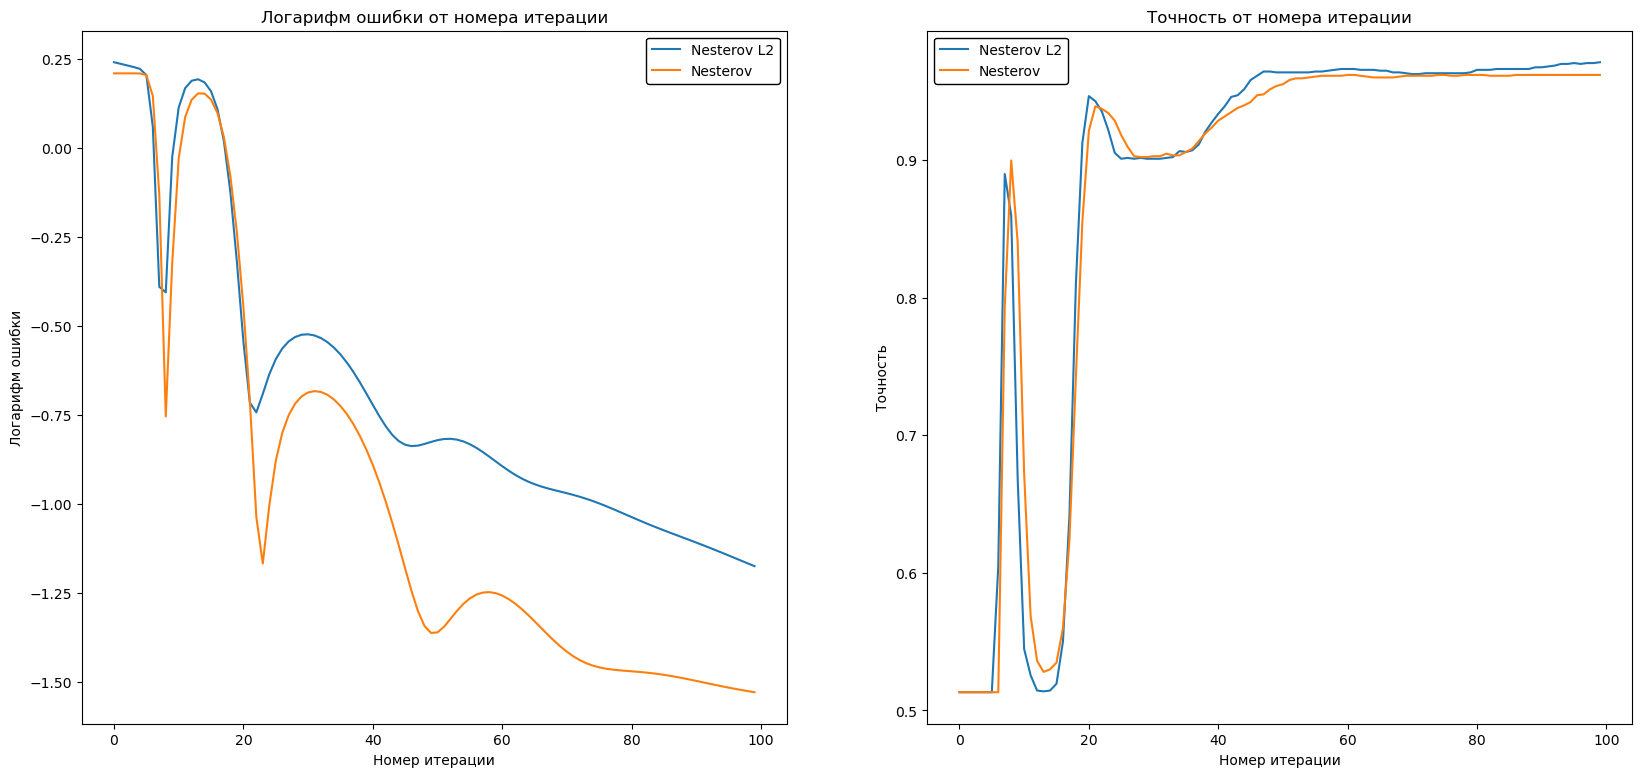

In [232]:
fig, ax = plt.subplots(1, 2, figsize=(20,9))

for tmp in [nesterov_l2, nesterov]:
    ax[0].plot(range(len(tmp.errors)), np.log10(tmp.errors), label=tmp.label)
    ax[1].plot(range(len(tmp.accuracy)), tmp.accuracy, label=tmp.label)

ax[0].set_title("Логарифм ошибки от номера итерации")
legend_box = ax[0].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[0].set_xlabel("Номер итерации")
ax[0].set_ylabel("Логарифм ошибки")

ax[1].set_title("Точность от номера итерации")
legend_box = ax[1].legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
ax[1].set_xlabel("Номер итерации")
ax[1].set_ylabel("Точность")

# Вывод:
Техника рестартов не помогла сходимости в этой задаче, но зато логрегрессия показывает лучшую точность на задаче, что является на мой взгляд более важным фактором, поэтому техника рестартов помогает на практике.